<font size="4" >Importing Libraries</font>

In [51]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import copy, math

<font size="4"> Importing data and processing it </font>

In [52]:
data = pd.read_csv("House_Rent_Dataset.csv")
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


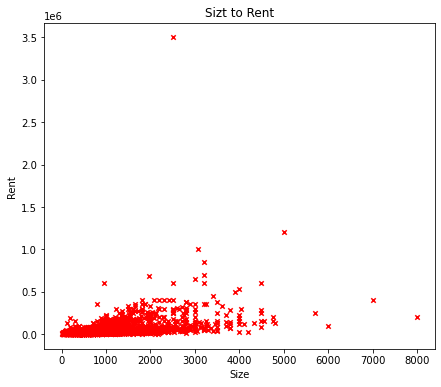

In [53]:
df = pd.DataFrame(data, columns= ['Rent','Size','Bathroom'])
df = df.dropna()
df.plot(title = 'Sizt to Rent' , x='Size',y='Rent',kind='scatter',color='red',marker='x',figsize=(7, 6))
plt.show()

<font size='4'> slice df to x and y </font>

In [55]:

x = df.iloc[:, 1:3]
y = df.iloc[:,0]


<font size = '4' > Cost Function </font>

In [56]:

def compute_cost(x, y, w, b): 
    # fw_b = wn * xn + b , wn and xn are arrays
    # cost f(unction = 1 / 2m sum ( y(Prediction) - y )^2
    m  = x.shape[0]
    n  = len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(x.iloc[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar             
    cost = cost / (2 * m)                                              #scalar  
 
    return cost                              #scalar   
    

In [57]:
# Compute cost with some initial values for paramaters w, b ,x = [ bedroom , bathroom , sqft living , sqft lot , floors']
initial_w = np.zeros(x.shape[1])
initial_b = 0.
cost = compute_cost(x, y , initial_w, initial_b)

print(f'Cost at optimal w : {cost}')


Cost at optimal w : 3661933977.985251


<font size =4> Gradient Descent </font>

In [58]:
def compute_gradient(x, y, w, b): 
    ''' x is (m,n) array
        y is (m,) array
        w is (n,) array
        b scalar
        Returns:
        dj_dw = sum ( (fwb - y[i] )* x[i]) / m
        dj_db = sum ( (fwb - y[i] ) / m
        dj_dw (array (n,)): The gradient of the cost w.r.t. the parameters w. 
        dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
      '''

    m,n = x.shape
    dj_dw =  np.zeros(x.shape[1])
    dj_db = 0.
    for i in range(m):
        #difference between prediction and y
        error = (np.dot(w,x.iloc[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] += ( error * x.iloc[i][j])
        dj_db += error
  
    return dj_db/m , dj_dw/m
            


In [59]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(x,y,initial_w,initial_b)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b:  {tmp_dj_dw}')



dj_db at initial w,b: -34993.45132743363
dj_dw at initial w,b:  [-54336871.40012642    -99268.51243152]


In [60]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(x, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

Iteration    0: Cost 2679550436.30   
Iteration  100: Cost 2558744243.34   
Iteration  200: Cost 2558741985.90   
Iteration  300: Cost 2558739728.51   
Iteration  400: Cost 2558737471.17   
Iteration  500: Cost 2558735213.87   
Iteration  600: Cost 2558732956.62   
Iteration  700: Cost 2558730699.42   
Iteration  800: Cost 2558728442.27   
Iteration  900: Cost 2558726185.17   
b,w found by gradient descent: -2.12,[40.60241106  2.65506653] 


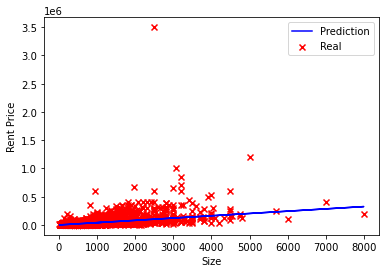

In [61]:

initw = np.zeros(x.shape[1]) 
initb= 0.0
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x, y, initw, initb,compute_cost, compute_gradient, alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m = x.shape[0]
predicted  = np.zeros(x.shape[0])
for i in range(m):
    predicted[i] = np.dot(x.iloc[i], (w_final)) + b_final
    

# Plot the linear fit
plt.plot(x.iloc[:,0], predicted, c = "b",label = 'Prediction')
plt.scatter(x.iloc[:,0],y,c = "r",marker ="x" ,label ="Real")
plt.xlabel("Size")
plt.ylabel("Rent Price")
plt.legend()
plt.show()
